0 2.8763726
1000 0.5652843
2000 0.33677787
3000 0.31670395
4000 0.31538078

Hypothesis:
[[0.         0.3683282  0.41579872 ... 0.         0.39517415 0.        ]
 [0.         0.37025142 0.40268454 ... 0.         0.39122662 0.        ]
 [0.         0.37031555 0.40269145 ... 0.         0.39122424 0.        ]
 ...
 [0.         0.36849785 0.41484606 ... 0.         0.39500487 0.        ]
 [0.         0.36349952 0.5079309  ... 0.         0.39405495 0.        ]
 [0.         0.4022349  0.40293005 ... 0.         0.36498752 0.        ]] 
Predicted:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Accuracy:
0.6085119843482971


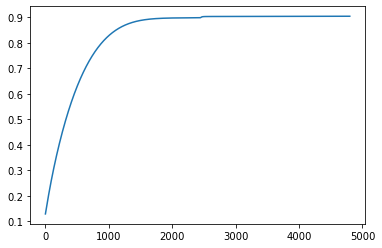

In [94]:
import numpy as np
import pandas as pd
import openpyxl as op
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

normalize=0.01
path_file = 'ACN.csv'
xy=np.loadtxt('ACN.csv', delimiter=',', dtype=np.float32)

x_data=xy[:,25:]
y_data=xy[:,:25]


X=tf.placeholder(tf.float32, shape=[None,25])
Y=tf.placeholder(tf.float32, shape=[None,25])

keep_prob = tf.placeholder(tf.float32)

testcsv=np.loadtxt('test.csv', delimiter=',', dtype=np.float32)
test=testcsv[:,:25]


w1=tf.Variable(tf.random_normal([25,25]), name='weight1')
b1=tf.Variable(tf.random_normal([25]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, w1) + b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

w2=tf.Variable(tf.random_normal([25,25]), name='weight2')
b2=tf.Variable(tf.random_normal([25]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, w2) + b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

w3=tf.Variable(tf.random_normal([25,25]), name='weight2')
b3=tf.Variable(tf.random_normal([25]), name='bias2')
hypothesis= tf.nn.relu(tf.matmul(layer2, w3) + b3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)

w4=tf.Variable(tf.random_normal([25,25]), name='weight2')
b4=tf.Variable(tf.random_normal([25]), name='bias2')
layer4 = tf.nn.relu(tf.matmul(layer3, w4) + b4)
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

w5=tf.Variable(tf.random_normal([25,25]), name='weight2')
b5=tf.Variable(tf.random_normal([25]), name='bias2')
hypothesis = tf.nn.relu(tf.matmul(layer4, w5) + b5)


cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    


    for step in range(20001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data, keep_prob: 0.7})
        if step % 1000 == 0:
            print(step, cost_val)
            

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data, keep_prob:0.7}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

    f=open('damage.csv','w',newline = '')
    wr=csv.writer(f)
    wr.writerows(sess.run(hypothesis,predicted,feed_dict={X: x_data, Y: y_data, keep_prob:0.7}))
    f.close()
